In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

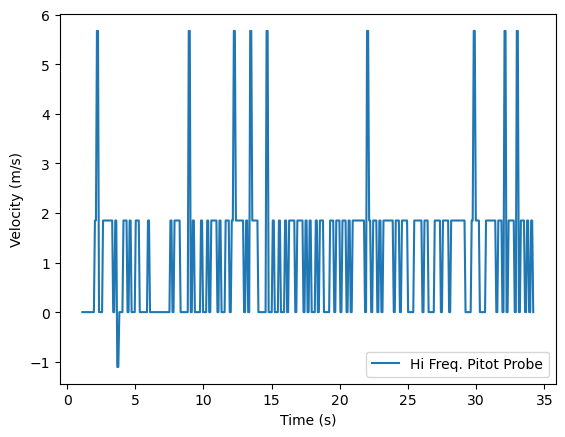

In [10]:
rho = 1.15
convFac = 1.016 #Volts -> mmHg

# wind_tunnel_6_27_23/Wind_Tunnel_Tube/PitotV0100.csv
# wind_tunnel_10_23/dualcalvariable.csv
# wind_tunnel_10_23/dualcal100.csv
wind_tunnel_probe = pd.read_csv('data_read/novtestvar1.csv')
col_name = 'TaredBaratronVoltage'
volt_data = wind_tunnel_probe[col_name]
num_volt_pts = len(volt_data)

for i in range(num_volt_pts):
    try:
        volt_data[i] = 2 + (1*math.sqrt((2*volt_data[i]*133.322*convFac)/1.15))
    except ValueError:
        volt_data[i] = volt_data[i-1]

# wind_tunnel_6_27_23/Test_Tube/PyV0100.xlsx
# wind_tunnel_10_23/dualreadcalibrationvar.xlsx
# wind_tunnel_10_23/dualreadcalibrationv50.xlsx
test_probe = pd.read_excel('data_read/functionalitytest.xlsx')
vel0_col = 'High Frequency Velocity (m/s)'
vel1_col = 'Low Frequency Velocity (m/s)'
time_col = 'Time Elapsed'

vel0_data = test_probe[vel0_col]
vel1_data = test_probe[vel1_col]
time_data = test_probe[time_col]
# vel_data[0] = 0
# time_data[0] = 0
# vel_data[7] = 0
# time_data[7] = 0
num_time_pts = len(time_data)
time_end = time_data[num_time_pts-1]

volt_time_data = np.linspace(0,time_end, num_volt_pts)

fig, ax = plt.subplots()

ax.plot(time_data,vel0_data, label='Hi Freq. Pitot Probe')
#ax.plot(time_data, vel1_data, label='Lo Freq. Pitot Probe')
#ax.plot(volt_time_data,volt_data, label='Wind Tunnel Pitot Probe')

ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()



In [ ]:
#8726 time data index to truncate from
fullspeed = vel_data[8726:len(vel_data)]

sampling_rate = len(fullspeed)/(time_end-time_data[8726])

time_fullspeed = time_data[8726:len(time_data)]

Y = np.fft.fft(fullspeed) #Fourier of f
N = len(Y) #num_pts -> data length
n = np.arange(N) 
T = N/sampling_rate
freq = sampling_rate * np.arange(0, int(N/2))/N  

P2 = np.abs(Y/N);
P1 = P2[0:int(N/2)]
P1[1:-2] = 2*P1[1:-2]


plt.figure(figsize = (12, 6))
plt.subplot(211)

plt.stem(freq, P1 , 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.grid()
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 250)
plt.ylim(0,0.06)

In [ ]:

#19701 volt time data index to truncate from
tunnel_probe_fullspeed = volt_data[19701:len(volt_data)]
tunnel_sampling_rate = len(tunnel_probe_fullspeed)/(time_end-time_data[8726]) #8726 of time data = 19701 of tunnel probe data at ~20 seconds time.

X = np.fft.fft(tunnel_probe_fullspeed) #Fourier of f
M = len(X) #num_pts -> data length
m = np.arange(M)
S = M/tunnel_sampling_rate
freq = tunnel_sampling_rate * np.arange(0, int(M/2))/M  

P4 = np.abs(X/M);
P3 = P4[0:int(M/2)]
P3[1:-2] = 2*P3[1:-2]


plt.figure(figsize = (12, 6))
plt.subplot(211)

plt.stem(freq, P3 , 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.grid()
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 250)
plt.ylim(0,0.06)